In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib import style


In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("advertising_data.csv")

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df = df.copy()

In [8]:
df.shape

(200, 4)

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


df.info()

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


                    DATA CLEANING

<AxesSubplot:>

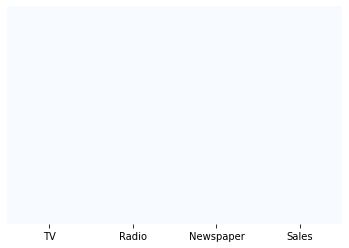

In [15]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )


In [16]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


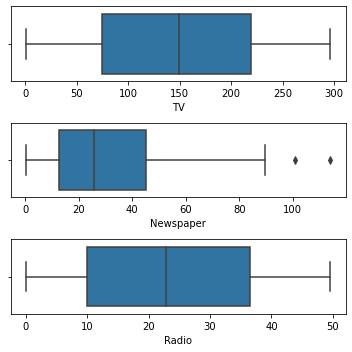

In [20]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

                EXPLORATORY DATA ANALYSIS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


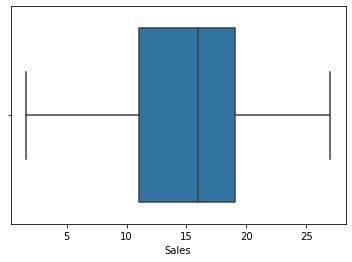

In [21]:
sns.boxplot(df["Sales"])
plt.show()

In [ ]:
#There is no outlier present in target Sales
#There is average sales of about 15,000 dollars

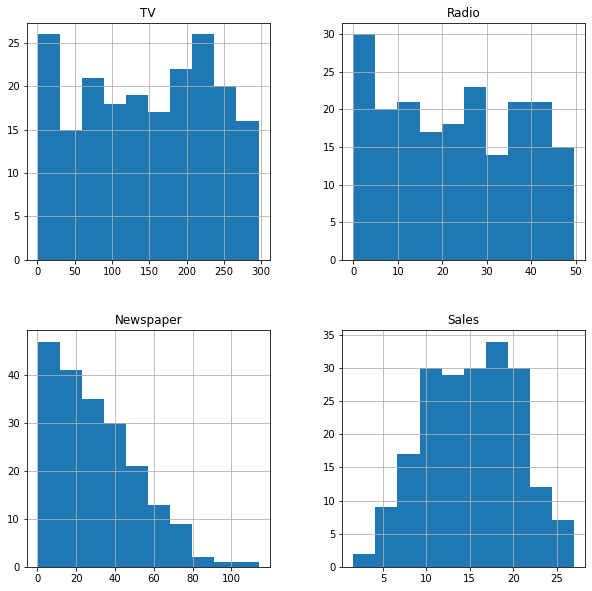

In [22]:
df.hist(bins = 10,figsize = (10,10))
plt.show()

In [ ]:
#Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


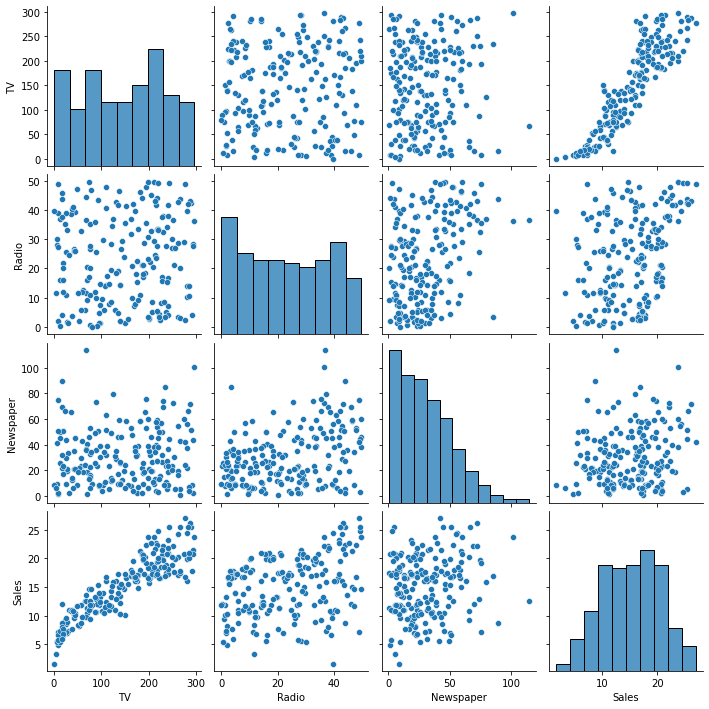

In [23]:
sns.pairplot(df,size = 2.5)
plt.show()

In [ ]:
#Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
#There is no correlation seems between all features.

<AxesSubplot:>

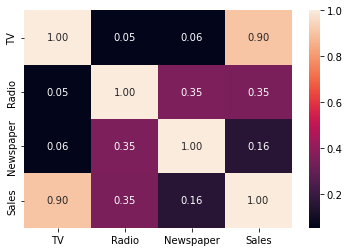

In [24]:
corr = df.corr()
sns.heatmap(corr,annot = True,fmt = ".2f")

In [25]:
#As is visible from the pairplot and the heatmap, the variable TV seems to be mostcorrelated with Sales

                Data Preprocessing

In [26]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.2, random_state = 42)


                Model Training

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept =True)
regressor.fit(x_train,y_train)

LinearRegression()

In [37]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.05450927 0.10094536 0.00433665]
Intercept : 4.714126402214134


                Model Prediction

In [40]:
Y_pred = regressor.predict(x_test)

                Metrices

In [43]:
y_pred = regressor.predict(x_test)

from sklearn import metrics
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 1.7052146229349232


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9059011844150826

In [46]:
import statsmodels.api as sm

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           8.13e-99
Time:                        18:54:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0